# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Análisis de Componentes Principales (PCA)

## Entendiendo la varianza, la covarianza y la correlación

Uno de los conceptos más recurrentes con el que te encuentras en estadística y aprendizaje automático es la **covarianza**.

Muchos de los métodos de preprocesamiento o análisis predictivo, dependen de este elemento, por ejemplo para reducir dimensiones en los datos, realizar regresiones, detectar valores atípicos multivariados, entre otros. Conocer la covarianza puede proporcionar mucha más información sobre cómo resolver problemas de varias variables. 

Para entender mejor este concepto veamos primero lo que significa la **varianza**. Sabemos que la varianza representa la variación de valores en una sola variable y se esribe como sigue:

$$
\sigma^2 = \frac{1}{n-1} \sum_{i}^{n}(x_i - \bar{x})^2
$$

donde $x_i$ representan el conjunto de datos, para $i=1, \dots, n$ y $\bar{x}$ es la media muestral.

Veamos un ejemplo:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import macti.visual as mvis
import matem

In [2]:
np.random.seed(0)

N = 20 # cantidad de datos
# Generación de un conjunto de datos
x = np.array([i for i in range(N)])
y = np.random.rand(N)*0.5-0.5
z = np.random.randn(len(y))

Varianza baja: 0.02003400225875065


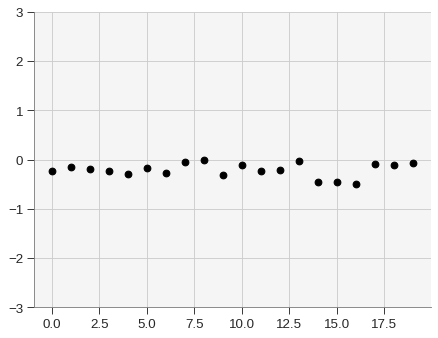

In [3]:
print('Varianza baja: {}'.format(y.var(ddof=1)))

plt.scatter(x, y)
plt.ylim(-3,3)
plt.show()

Varianza alta: 1.4832060046564395


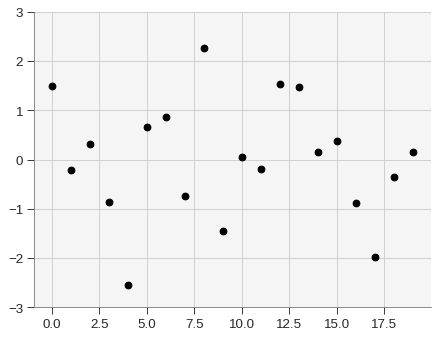

In [4]:
print('Varianza alta: {}'.format(z.var(ddof=1)))

plt.scatter(x, z)
plt.ylim(-3,3)
plt.show()

La **covarianza** se calcula entre dos variables diferentes y su propósito es calcular cómo estas dos variables varian en conjunto. La covarianza se escribe como sigue:

$$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

El resultado del cálculo de la covarianza, se puede poner en forma de una matriz somo sigue:

$$
\left[
\begin{array}{cc}
S_{xx} & S_{xy} \\
S_{xy} & S_{yy}
\end{array}\right] =
\left[
\begin{array}{cc}
cov(x,x) & cov(x,y) \\
cov(y,x) & cov(y,y)
\end{array}\right] = 
\left[
\begin{array}{cc}
var(x) & cov(x,y) \\
cov(y,x) & var(y)
\end{array}\right] =
\left[
\begin{array}{cc}
\sigma^2_{x} & S_{xy} \\
S_{xy} & \sigma^2_{y}
\end{array}\right] 
$$

Esta matriz es simétrica. Además, los términos de la diagonal se transforman en la varianza correspondiente.

Definamos varios arreglos de datos y calculemos la covarianza entre ellos:

In [5]:
# Generación de un conjunto de datos
x0 = np.linspace(0,10,N) 
y0 = x + np.random.randn(N)*2

x1 = np.random.randn(len(y))*10
y1 = np.random.randn(len(y))*10

x2 = np.arange(0,N)*100
y2 = -x2 + np.random.randn(N)*500

In [6]:
print('Arreglo x :\n{}'.format(x0))
print('Arreglo y :\n{}'.format(y0))

print('Arreglo x1 :\n{}'.format(x1))
print('Arreglo y1 :\n{}'.format(y1))

print('Arreglo x2 :\n{}'.format(x2))
print('Arreglo y2 :\n{}'.format(y2))

Arreglo x :
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
Arreglo y :
[ 2.46058136  3.4047597   1.22534637  2.3953945   1.90289407  2.15996413
  2.58745962 10.90155079  6.98069564  8.1238514   7.49440928 12.55498071
  8.7722043  12.57451944 12.20906688 15.773805   14.97838972 14.63873563
 17.94363554 19.85666374]
Arreglo x1 :
[  0.66517222   3.02471898  -6.34322094  -3.62741166  -6.72460448
  -3.59553162  -8.13146282 -17.26282602   1.77426142  -4.01780936
 -16.30198347   4.62782256  -9.07298364   0.51945396   7.29090562
   1.28982911  11.39400685 -12.3482582    4.02341641  -6.84810091]
Arreglo y1 :
[ -8.70797149  -5.78849665  -3.11552532   0.56165342 -11.65149841
   9.00826487   4.6566244  -15.36243686  14.88252194  18.95889176
  11.78779571  -1.79924836 -10.70752622  10.54451727  -4.031769

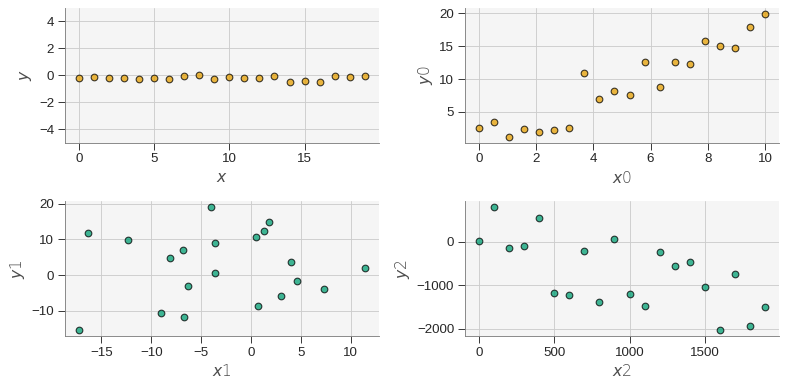

In [7]:
plt.figure(figsize=(10,5))

ax = plt.subplot(221)
plt.scatter(x,y, fc='C1', ec='C0', alpha=0.75)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-5,5)

ax0 = plt.subplot(222)
plt.scatter(x0,y0, fc='C1', ec='C0', alpha=0.75)
plt.xlabel('$x0$')
plt.ylabel('$y0$')

ax1 = plt.subplot(223)
plt.scatter(x1,y1, fc='C3', ec='C0', alpha=0.75)
plt.xlabel('$x1$')
plt.ylabel('$y1$')

ax2 = plt.subplot(224)
plt.scatter(x2,y2, fc='C3', ec='C0', alpha=0.75)
plt.xlabel('$x2$')
plt.ylabel('$y2$')

plt.tight_layout()
plt.show()

In [8]:
A = np.cov(x,y)
A

array([[ 3.50000000e+01, -5.49167710e-02],
       [-5.49167710e-02,  2.00340023e-02]])

In [9]:
A0 = np.cov(x0
            ,y0)
A0

array([[ 9.69529086, 17.46321712],
       [17.46321712, 35.48030684]])

In [10]:
A1 = np.cov(x1,y1)
A1

array([[57.71189252,  5.61179535],
       [ 5.61179535, 93.39024852]])

In [11]:
A2 = np.cov(x2,y2)
A2

array([[ 350000.        , -308432.89578619],
       [-308432.89578619,  629259.36924675]])

La covariance solo nos proporciona información a cerca de la variación y dirección de la relación entre dos variables. 

Por otro lado la **correlación** está limitada entre $-1$ y $1$.

In [12]:
print(np.corrcoef(x, y))
print(np.corrcoef(x0, y0))
print(np.corrcoef(x1, y1))
print(np.corrcoef(x2, y2))

[[ 1.         -0.06558237]
 [-0.06558237  1.        ]]
[[1.         0.94156466]
 [0.94156466 1.        ]]
[[1.        0.0764396]
 [0.0764396 1.       ]]
[[ 1.         -0.65722159]
 [-0.65722159  1.        ]]


## Eigenvalores y eigenvectores de la covarianza

Los eigenvalores y eigenvectores de la matriz de covarianza representan la magnitud de la dispersión en la dirección de las componentes principales. Recordemos que:

$$
A u = \lambda u
$$

donde $A$ es la matriz, $u$ es un eigenvector y $\lambda$ es un eigenvalor. 

Podemos por ejemplo, calcular los eigenvectores de las matrices de covarianza de los ejemplos anteriores:

In [13]:
# Lo podemos hacer con np.linagl.eig()
np.linalg.eig(A)

(array([3.50000862e+01, 1.99477859e-02]),
 array([[ 0.99999877,  0.00156994],
        [-0.00156994,  0.99999877]]))

Usaremos las funciones `eigen_land()` y `print_Aulu()` que hemos definido en nuestro módulo `matem`.

In [14]:
w, v = matem.eigen_land(A)
print()
matem.print_Aulu(A, w, v)

eigenvalores = [3.50000862e+01 1.99477859e-02]
eigenvectores:
 [ 0.99999877 -0.00156994] 
 [0.00156994 0.99999877]
ángulo entre eigenvectores = 90.0

𝐴𝑢 = [35.00004308 -0.05494816]
𝜆𝑢 = [35.00004308 -0.05494816]

𝐴𝑢 = [3.13168955e-05 1.99477613e-02]
𝜆𝑢 = [3.13168955e-05 1.99477613e-02]



In [15]:
w0, v0 = matem.eigen_land(A0)
print()
matem.print_Aulu(A0, w0, v0)

eigenvalores = [ 0.88110139 44.2944963 ]
eigenvectores:
 [-0.89273218  0.45058768] 
 [-0.45058768 -0.89273218]
ángulo entre eigenvectores = 90.0

𝐴𝑢 = [-0.78658757  0.39701344]
𝜆𝑢 = [-0.78658757  0.39701344]

𝐴𝑢 = [-19.95855448 -39.54312211]
𝜆𝑢 = [-19.95855448 -39.54312211]



In [16]:
w1, v1 = matem.eigen_land(A1)
print()
matem.print_Aulu(A1, w1, v1)

eigenvalores = [56.85004063 94.2521004 ]
eigenvectores:
 [-0.9884114   0.15179888] 
 [-0.15179888 -0.9884114 ]
ángulo entre eigenvectores = 90.0

𝐴𝑢 = [-56.19122841   8.62977231]
𝜆𝑢 = [-56.19122841   8.62977231]

𝐴𝑢 = [-14.30736297 -93.15985077]
𝜆𝑢 = [-14.30736297 -93.15985077]



In [17]:
w2, v2 = matem.eigen_land(A2)
print()
matem.print_Aulu(A2, w2, v2)

eigenvalores = [151063.14754229 828196.22170446]
eigenvectores:
 [-0.84036132 -0.54202661] 
 [ 0.54202661 -0.84036132]
ángulo entre eigenvectores = 90.0

𝐴𝑢 = [-126947.62666677  -81880.24565827]
𝜆𝑢 = [-126947.62666677  -81880.24565827]

𝐴𝑢 = [ 448904.38991697 -695984.07335141]
𝜆𝑢 = [ 448904.38991697 -695984.07335141]



Vamos a graficar los eigenvectores con nuestra función `plot_vectors()` definida en `matem`:

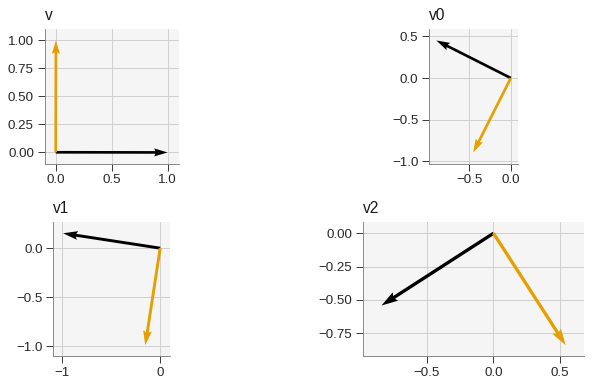

In [35]:
plt.figure(figsize=(10,5))

ax = plt.subplot(2,2,1)
matem.plot_vectors([v[:,0], v[:,1]], w=0.020, ax = ax, limit=True)
ax.set_title('v')

ax0 = plt.subplot(2,2,2)
matem.plot_vectors([v0[:,0], v0[:,1]], w=0.030, ax = ax0, limit=True)
ax0.set_title('v0')

ax1 = plt.subplot(2,2,3)
matem.plot_vectors([v1[:,0], v1[:,1]], w=0.025, ax = ax1, limit=True)
ax1.set_title('v1')

ax2 = plt.subplot(2,2,4)
matem.plot_vectors([v2[:,0], v2[:,1]], w=0.015, ax = ax2, limit=True)
ax2.set_title('v2')

plt.tight_layout()
plt.show()

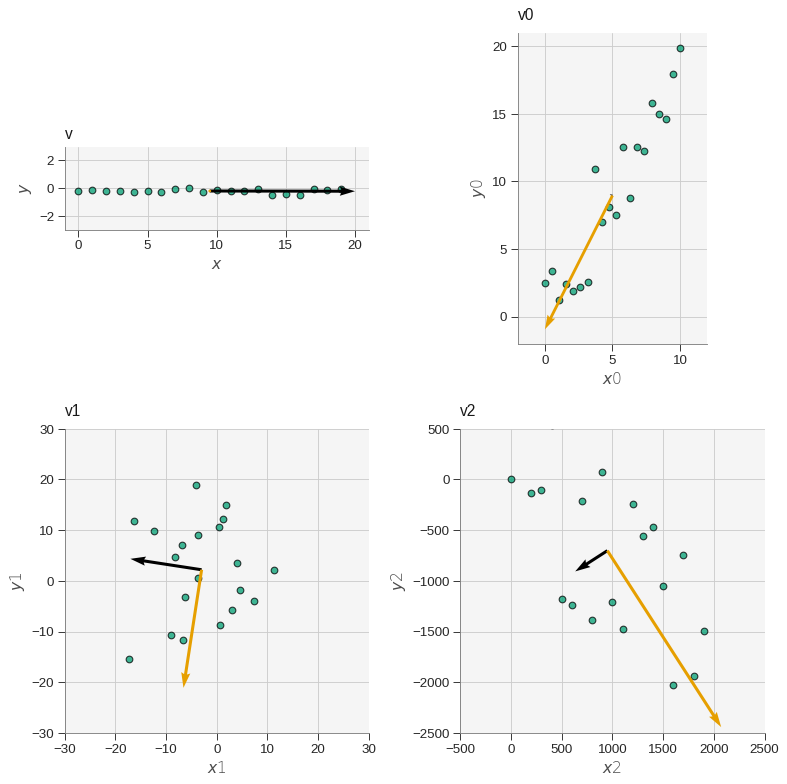

In [78]:
plt.figure(figsize=(10,10))

# Primer conjunto de datos
ax = plt.subplot(2,2,1)
ax.scatter(x,y, fc='C3', ec='C0', alpha=0.75)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
matem.plot_vectors([v[:,0]*w[0]*0.3, v[:,1]*w[1]*0.3], 
             baseline=np.array([[np.mean(x),np.mean(y)], [np.mean(x),np.mean(y)]]), 
             ax = ax, limit=False)
ax.set_ylim(-3, 3)
ax.set_xlim(-1, 21)
ax.set_title('v')

# Segundo conjunto de datos
ax0 = plt.subplot(2,2,2)
ax0.scatter(x0,y0, fc='C3', ec='C0', alpha=0.75)
ax0.set_xlabel('$x0$')
ax0.set_ylabel('$y0$')
matem.plot_vectors([v0[:,0]*w0[0]*0.25, v0[:,1]*w0[1]*0.25], w=0.015,
             baseline=np.array([[np.mean(x0),np.mean(y0)], [np.mean(x0),np.mean(y0)]]), 
             ax = ax0, limit=False)
ax0.set_ylim(-2, 21)
ax0.set_xlim(-2, 12)
ax0.set_title('v0')

# Tercer conjunto de datos
ax1 = plt.subplot(2,2,3)
ax1.scatter(x1,y1, fc='C3', ec='C0', alpha=0.75)
ax1.set_xlabel('$x1$')
ax1.set_ylabel('$y1$')
matem.plot_vectors([v1[:,0]*w1[0]*0.25, v1[:,1]*w1[1]*0.25],
             baseline=np.array([[np.mean(x1),np.mean(y1)], [np.mean(x1),np.mean(y1)]]), 
             ax = ax1, limit=False)
ax1.set_ylim(-30, 30)
ax1.set_xlim(-30, 30)
ax1.set_title('v1')

# Cuarto conjunto de datos
ax2 = plt.subplot(2,2,4)
ax2.scatter(x2,y2, fc='C3', ec='C0', alpha=0.75)
ax2.set_xlabel('$x2$')
ax2.set_ylabel('$y2$')
matem.plot_vectors([v2[:,0]*w2[0]*0.0025, v2[:,1]*w2[1]*0.0025], 
             baseline=np.array([[np.mean(x2),np.mean(y2)], [np.mean(x2),np.mean(y2)]]), 
             ax = ax2, limit=False)
ax2.set_ylim(-2500, 500)
ax2.set_xlim(-500, 2500)
ax2.set_title('v2')

plt.tight_layout()
plt.show()

**Recapitulando.**

* Los eigenvalores de la matriz de covarianza representan la magnitud de la dispersión en la dirección de las componentes principales.
* Cuando la covarianza es pequeña, los eigenvalores son muy parecidos a los valores de la varianza.

In [38]:
print('Matriz de covarianza: \n {}'.format(A))
print('Eigenvalores: \n {}'.format(w))

Matriz de covarianza: 
 [[ 3.50000000e+01 -5.49167710e-02]
 [-5.49167710e-02  2.00340023e-02]]
Eigenvalores: 
 [3.50000862e+01 1.99477859e-02]


In [39]:
print('Matriz de covarianza: \n {}'.format(A0))
print('Eigenvalores: \n {}'.format(w0))

Matriz de covarianza: 
 [[ 9.69529086 17.46321712]
 [17.46321712 35.48030684]]
Eigenvalores: 
 [ 0.88110139 44.2944963 ]


In [40]:
print('Matriz de covarianza: \n {}'.format(A1))
print('Eigenvalores: \n {}'.format(w1))

Matriz de covarianza: 
 [[57.71189252  5.61179535]
 [ 5.61179535 93.39024852]]
Eigenvalores: 
 [56.85004063 94.2521004 ]


In [41]:
print('Matriz de covarianza: \n {}'.format(A2))
print('Eigenvalores: \n {}'.format(w2))

Matriz de covarianza: 
 [[ 350000.         -308432.89578619]
 [-308432.89578619  629259.36924675]]
Eigenvalores: 
 [151063.14754229 828196.22170446]


# Pasos para realizar *PCA*

El Análisis de Componentes Principales (PCA por sus siglas en inglés) es un método para reducir la dimensionalidad de conjuntos de datos de gran tamaño. La idea es **transformar un conjunto de variables amplio en otro más reducido que mantenga la mayor cantidad de información**. El objetivo final es que los algoritmos de aprendizaje de máquina puedan analizar con mayor facilidad estos datos reducidos en dimensionalidad.

## Estandarización.

Existen varios métodos para estandarizar los datos, véase por ejemplo [Cómo estandarizar variables](https://www.kaggle.com/code/manuelmartinrivas/c-mo-estandarizar-variables/notebook) ,  de tal manera que los datos estén en rangos más manejables. El método más usado se basa en lo siguiente:

$$
z = \frac{x - \bar{x}}{\sigma^2_x}
$$

donde $x$ representan los datos, $\bar{x}$ la media y $\sigma^2_x$ la desviación estándar.

Veamos uno de los ejemplos anteriores.

In [45]:
print('datos: \n\n x0 = {} \n\n y0 = {}'.format(x0, y0))

datos: 

 x0 = [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ] 

 y0 = [ 2.46058136  3.4047597   1.22534637  2.3953945   1.90289407  2.15996413
  2.58745962 10.90155079  6.98069564  8.1238514   7.49440928 12.55498071
  8.7722043  12.57451944 12.20906688 15.773805   14.97838972 14.63873563
 17.94363554 19.85666374]


El método `scipy.stats.zscore()` realiza este tipo de estandarización:

In [58]:
z_x0 = scipy.stats.zscore(x0)
z_y0 = scipy.stats.zscore(y0)
print('datos estandarizados: \n\n z_x0 = {} \n\n z_y0 = {}'.format(z_x0, z_y0))

datos estandarizados: 

 z_x0 = [-1.64750894 -1.47408695 -1.30066495 -1.12724296 -0.95382097 -0.78039897
 -0.60697698 -0.43355498 -0.26013299 -0.086711    0.086711    0.26013299
  0.43355498  0.60697698  0.78039897  0.95382097  1.12724296  1.30066495
  1.47408695  1.64750894] 

 z_y0 = [-1.11723834 -0.95460914 -1.33000036 -1.1284664  -1.21329672 -1.16901791
 -1.0953843   0.33666937 -0.33867504 -0.14177314 -0.25019087  0.62146302
 -0.03009813  0.62482846  0.56188139  1.17588672  1.03888108  0.98037765
  1.54962737  1.87913531]


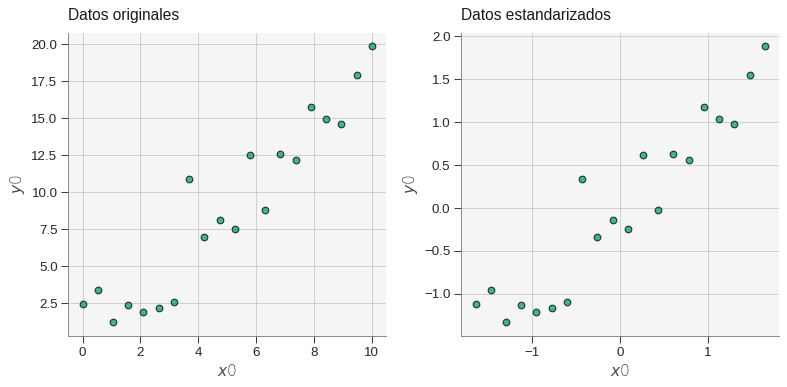

In [59]:
plt.figure(figsize=(10,5))

# Datos originales
ax = plt.subplot(1,2,1)
ax.scatter(x0,y0, fc='C3', ec='C0', alpha=0.75, zorder=5)
ax.set_xlabel('$x0$')
ax.set_ylabel('$y0$')
ax.set_title('Datos originales')

# Segundo conjunto de datos
ax0 = plt.subplot(1,2,2)
ax0.scatter(z_x0,z_y0, fc='C3', ec='C0', alpha=0.75)
ax0.set_xlabel('$x0$')
ax0.set_ylabel('$y0$')
ax0.set_title('Datos estandarizados')

plt.tight_layout()
plt.show()

## Eigenvalores de la matriz de covarianza

Ahora calculamos los eigenvalores y eigenvectores de la matriz de covarianza de los datos estandarizados para encontrar las componentes principales.

In [70]:
As = np.cov(z_x0, z_y0)
ws, vs = matem.eigen_land(As)
print()
matem.print_Aulu(As, ws, vs)

eigenvalores = [2.04375227 0.06151089]
eigenvectores:
 [0.70710678 0.70710678] 
 [-0.70710678  0.70710678]
ángulo entre eigenvectores = 90.0

𝐴𝑢 = [1.44515109 1.44515109]
𝜆𝑢 = [1.44515109 1.44515109]

𝐴𝑢 = [-0.04349476  0.04349476]
𝜆𝑢 = [-0.04349476  0.04349476]



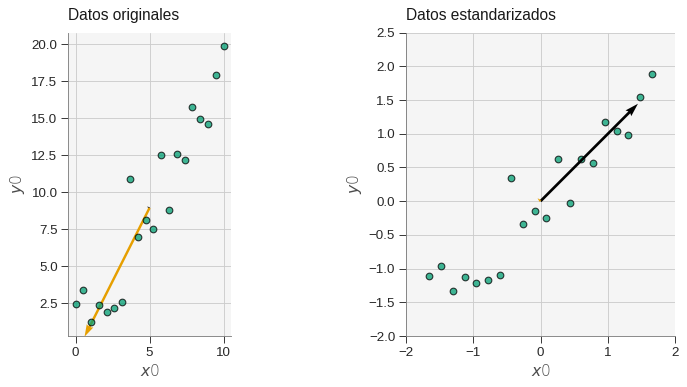

In [83]:
plt.figure(figsize=(10,5))

# Datos originales
ax = plt.subplot(1,2,1)
ax.scatter(x0,y0, fc='C3', ec='C0', alpha=0.75, zorder=5)
matem.plot_vectors([v0[:,0]*w0[0]*0.22, v0[:,1]*w0[1]*0.22], w=0.015,
             baseline=np.array([[np.mean(x0),np.mean(y0)], [np.mean(x0),np.mean(y0)]]), 
             ax = ax, limit=False)
ax0.set_ylim(-2, 21)
ax0.set_xlim(-2, 17)
ax.set_xlabel('$x0$')
ax.set_ylabel('$y0$')
ax.set_title('Datos originales')

# Segundo conjunto de datos
ax0 = plt.subplot(1,2,2)
ax0.scatter(z_x0,z_y0, fc='C3', ec='C0', alpha=0.75)
matem.plot_vectors([vs[:,0]*ws[0], vs[:,1]*ws[1]], 
             baseline=np.array([[np.mean(z_x0),np.mean(z_y0)], [np.mean(z_x0),np.mean(z_y0)]]), 
             ax = ax0, limit=False)
ax0.set_ylim(-2, 2.5)
ax0.set_xlim(-2, 2)
ax0.set_xlabel('$x0$')
ax0.set_ylabel('$y0$')
ax0.set_title('Datos estandarizados')

plt.tight_layout()
plt.show()



Calculamos el porcentaje de varianza de cada componente (información que contiene): 
$$\text{Porcentaje de varianza} = \frac{\lambda_i}{\sum_{i} \lambda_i}$$

In [84]:
pv = [l / np.sum(ws) for l in ws]
pv

[0.9707823291051108, 0.02921767089488928]

Observa que la primera componente (primer eigenvalor) contiene el 97% de toda la información, mientas que la segunda
(segundo eigenvalor) solo contiene aproximadamente el 2.9% .

## Vector de características (*Feature vector*)

Con el cálculo anterior podemos decidir si mantenemos o no toda la información. Es posible formar una matriz cuyas columnas sean los eigenvectores que decidamos mantener. Los eigenvectores se ordenan de mayor a menor significancia, con base en su eigenvalor.

Esto nos dirige hacia la reducción de dimensiones, si tenemos originalmente $n$ dimensiones y decidimos solo mantener $p$ de ellas, con $p<n$, entonces reducimos la dimensionalidad en $n-p$ dimensiones. 

En nuestro ejemplo, si mantenemos toda la información tendríamos:

In [85]:
fv = np.array([vs[:,0], vs[:,1]]).T
fv

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Pero si decidimos eliminar la segunda componente tendríamos:

In [86]:
fv = np.array([vs[:,0]]).T
fv

array([[0.70710678],
       [0.70710678]])

## Reducción de la dimensionalidad

Usando el vector de característica podemos hacer una proyección hacia el número de dimensiones reducidas mediante la siguiente operación:

$$
A_r = A_s \cdot f_v
$$

donde $A_s$ es una matriz de datos, cuyas columnas son los datos originales estandarizados; $f_v$ es el vector de características, cuyas columnas son los eigenvectores ordenados de acuerdo con su eigenvalor de mayor a menor; $A_r$ es la matriz de datos reducida, cuyas columnas contienen los datos reducidos.

$A_s$ es una matriz de tamaño $n \times v$, con $n$ el número de muestras y $v$ el número de variables; $f_v$ es una matriz de tamaño $v \times nc$ con $nc$ el número de componentes que deseamos mantener; $A_r$ resultará en una matriz de $n \times nc$, cuya dimensión ha sido reducida.

In [87]:
# matriz de datos estandarizados
sdata = np.array([z_x0, z_y0]).T
print(sdata.shape)
sdata

(20, 2)


array([[-1.64750894, -1.11723834],
       [-1.47408695, -0.95460914],
       [-1.30066495, -1.33000036],
       [-1.12724296, -1.1284664 ],
       [-0.95382097, -1.21329672],
       [-0.78039897, -1.16901791],
       [-0.60697698, -1.0953843 ],
       [-0.43355498,  0.33666937],
       [-0.26013299, -0.33867504],
       [-0.086711  , -0.14177314],
       [ 0.086711  , -0.25019087],
       [ 0.26013299,  0.62146302],
       [ 0.43355498, -0.03009813],
       [ 0.60697698,  0.62482846],
       [ 0.78039897,  0.56188139],
       [ 0.95382097,  1.17588672],
       [ 1.12724296,  1.03888108],
       [ 1.30066495,  0.98037765],
       [ 1.47408695,  1.54962737],
       [ 1.64750894,  1.87913531]])

In [88]:
# Feature vector
print(fv.shape)
fv

(2, 1)


array([[0.70710678],
       [0.70710678]])

In [90]:
# matriz de datos reducidos
rdata = np.dot(sdata, fv)
print(rdata.shape)
rdata

(20, 1)


array([[-1.95497155],
       [-1.71734747],
       [-1.86016128],
       [-1.59502739],
       [-1.53238362],
       [-1.3784459 ],
       [-1.20375121],
       [-0.06850847],
       [-0.42342122],
       [-0.16156268],
       [-0.11559772],
       [ 0.62338252],
       [ 0.28528708],
       [ 0.87101798],
       [ 0.94913554],
       [ 1.50593075],
       [ 1.531681  ],
       [ 1.61294069],
       [ 2.1380889 ],
       [ 2.49371406]])

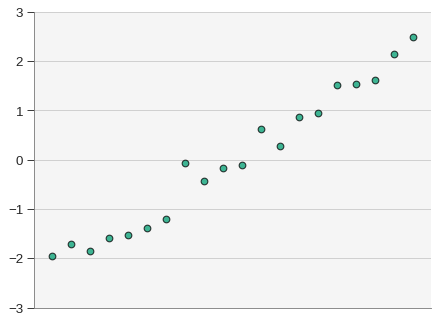

In [103]:
# Graficación de los datos reducidos
plt.scatter(np.arange(len(rdata)), rdata[:,0], fc='C3', ec='C0', alpha=0.75)

plt.xticks([])
plt.ylim(-3,3)
plt.show()

# Aplicación a un conjunto de datos.


## Función `mi_PCA()`

Primero definimos la función `mi_PCA()` con los pasos necesarios para realizar un PCA.

In [223]:
def mi_PCA(data, feature, comp = 2):
    """
    
    """
    # Estandarización de los datos
    sdata = scipy.stats.zscore(data)
    
    # Matriz de covarianza de los nuevos datos
    covmat = np.cov(sdata.T)

    # Cálculo de los eigenvalores y eigenvectores
    w, v = np.linalg.eig(covmat)
        
    # Ordenamiento de los vectores
    # np.argsort() regresa el índice de los elementos
    # de menor a mayor. Usando [::-1] generamos el 
    # vector en reversa, de tal manera que tendremos
    # los índices de los eigenvalores de mayor a menor.
    w_index = np.argsort(w)[::-1]
    
    # Selección de las componentes principales
    n_cols = w_index[:comp]

    # Selección de eigenvalores principales
    w_total = w.sum()
    wv = np.array([round(100*w[i]/w_total,2) for i in n_cols])
    
    # Selección de eigenvectores principales
    fv = v[:, n_cols]
    
    # Selección del nombre de la componente principal
    feat = [feature[i] for i in n_cols]
    
    # Reducción de la dimensionalidad
    P = np.dot(sdata, fv)

    return covmat, wv, fv, feat, P

## Obtención del conjunto de datos

Usaremos datos definidos en el módulo `sklearn`. Revisa [Dataset loading utilities](https://scikit-learn.org/stable/datasets.html) para más información.

In [262]:
#Initialization of Variables
grupo   = datasets.load_diabetes()
data    = grupo.data
target  = grupo.target
feature = grupo.feature_names

## Explorando los datos

In [263]:
print(type(grupo), type(data), type(target), type(feature))

<class 'sklearn.utils._bunch.Bunch'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'list'>


In [264]:
print(len(feature))
print(feature)

13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [265]:
print(data.shape)
data

(178, 13)


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [266]:
print(target.shape)
data

(178,)


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [267]:
print(grupo)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [268]:
print(grupo.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## Graficación

In [269]:
feature

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

0) alcohol
1) malic_acid
2) ash
3) alcalinity_of_ash
4) magnesium
5) total_phenols
6) flavanoids
7) nonflavanoid_phenols
8) proanthocyanins
9) color_intensity
10) hue
11) od280/od315_of_diluted_wines
12) proline


Selecciona una variable 9
Selecciona otra variable 4


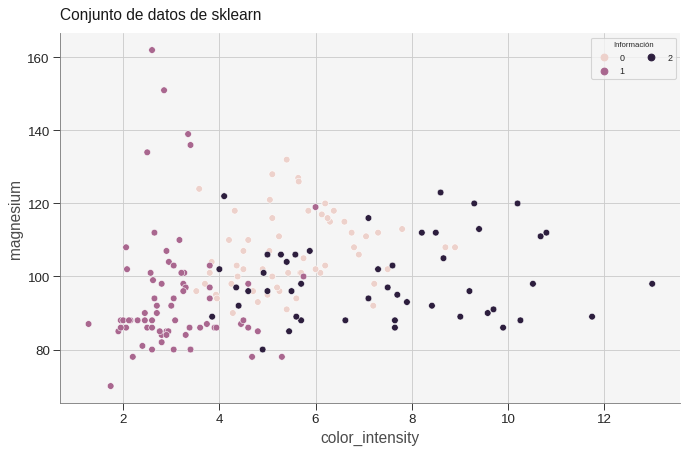

In [271]:
[print('{}) {}'.format(i, feature[i])) for i in range(len(feature))]

v1 = int(input('Selecciona una variable'))
v2 = int(input('Selecciona otra variable'))

fig ,ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title('Conjunto de datos de sklearn')
ax.set_xlabel(feature[v1])
ax.set_ylabel(feature[v2])

sns.scatterplot(
    x = data[:,v1],
    y = data[:,v2],
    hue = target
)

plt.legend(title='Información',
           title_fontsize=7,
           fontsize=8,
           ncol=2,
           frameon=True)

sns.despine()
plt.show()

## PCA usando `mi_PCA()`

Ahora realizamos la reducción de dimensiones usando nuestra función `mi_PCA()`:

In [287]:
covmat, wv, fv, feat, P = mi_PCA(data, feature, 7)

Revisemos cómo está la matriz de covarianza:

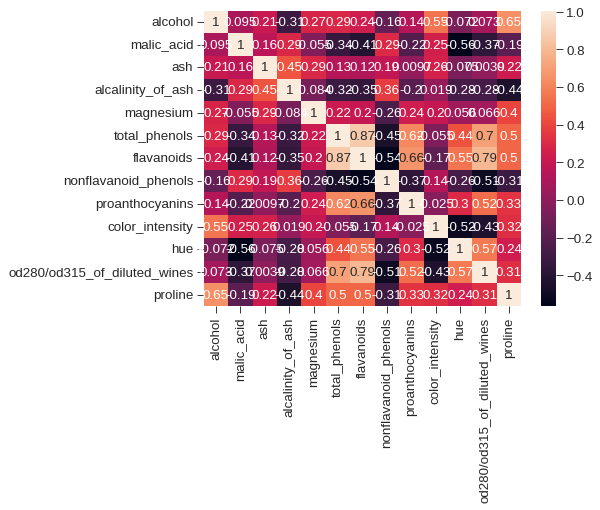

In [288]:
df_covmat = pd.DataFrame(covmat, 
                         columns=grupo.feature_names,
                         index = grupo.feature_names)
df_covmat
sns.heatmap(data=df_covmat, annot=True)
plt.show()

Ahora revisamos las componentes principales: eigenvalores y *Feature vector* $f_v$:

In [289]:
wv

array([36.2 , 19.21, 11.12,  7.07,  6.56,  4.94,  4.24])

In [293]:
wv.sum()

89.33999999999999

In [294]:
feat

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids']

In [295]:
df_pcomp = pd.DataFrame(np.array([wv]), columns=feat)
df_pcomp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids
0,36.2,19.21,11.12,7.07,6.56,4.94,4.24


<Axes: >

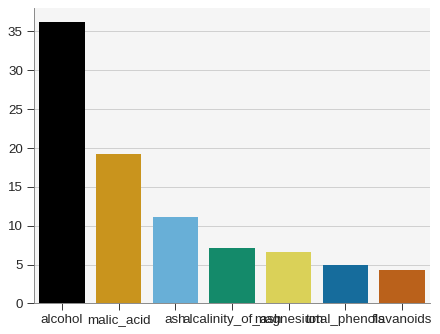

In [296]:
sns.barplot(data=df_pcomp)

In [297]:
fv

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 ],
       [-0.39466085,  0.06503951,  0.14617896, -0.19806835, -0.14931841,
        -0.0841223 ,  0.02792498],
       [-0.4229343 , -0.00335981,  0.1506819 , -0.15229479, -0.10902584,
        -0.01892002,  0.06068521],
       [ 0.2985331 ,  0.02877949,  0.17036816,  0.20330102, -0.50070298,
        -0.25859401, -0.59544729],
       [-0.31342949,  0.03930172,  0.14945431, -0.39905653,  0.13685982,
        -0.53379539, -0.37213935],
       [ 0.0886167 ,  0.5299

## Graficamos los datos reducidos

0) alcohol
1) malic_acid
2) ash
3) alcalinity_of_ash
4) magnesium
5) total_phenols
6) flavanoids


Selecciona una variable 0
Selecciona otra variable 6


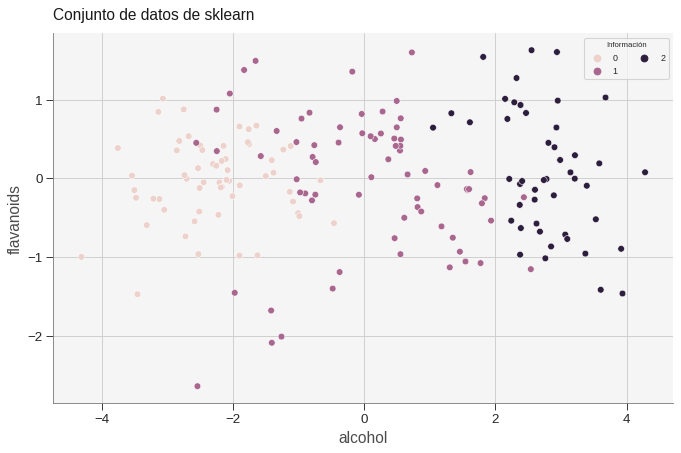

In [298]:
[print('{}) {}'.format(i, feat[i])) for i in range(len(feat))]

v1 = int(input('Selecciona una variable'))
v2 = int(input('Selecciona otra variable'))

fig ,ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title('Conjunto de datos de sklearn')
ax.set_xlabel(feat[v1])
ax.set_ylabel(feat[v2])

sns.scatterplot(
    x = P[:,v1],
    y = P[:,v2],
    hue = target
)

plt.legend(title='Información',
           title_fontsize=7,
           fontsize=8,
           ncol=2,
           frameon=True)

sns.despine()
plt.show()